# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc = requests.get(btc_url).json()
#print(json.dumps(response_btc,indent=4))
btc_price = response_btc["data"]["1"]["quotes"]["CAD"]["price"]
print(f"current BTC price is {btc_price}")
# Fetch current ETH price
response_eth = requests.get(eth_url).json()
#print(json.dumps(response_eth,indent=4))
eth_price = response_eth["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"current ETH price is {eth_price}")

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

current BTC price is 25347.797797
current ETH price is 1779.373793
The current value of your 1.2 BTC is $30417.36
The current value of your 5.3 ETH is $9430.68


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-09-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-19", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_portfolio

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-09-19 04:00:00+00:00  98.54  98.84  98.48  98.68  5978949       18815   

                                         SPY                            \
                                vwap    open    high       low   close   
timestamp                                                                
2022-09-19 04:00:00+00:00  98.677767  382.27  388.55  382.1784  388.55   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2022-09-19 04:00:00+00:00  72766494      492471  386.239339

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.68
Current SPY closing price: $388.55


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19427.50
The current value of your 200 AGG shares is $19736.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings =pd.DataFrame()
df_savings['amount'] = [crypto, shares]
df_savings.index = ['crypto', 'shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,39848.038459
shares,39163.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

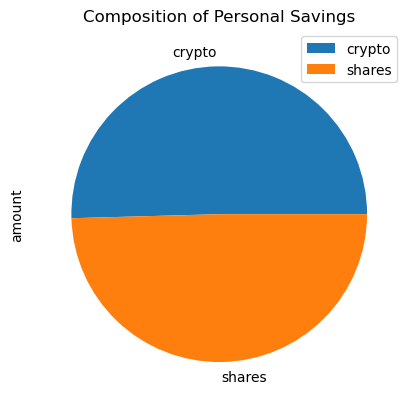

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have exact amount in your emergency fund.")
elif total_savings < emergency_fund:
    print("You do not have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
ticker = ['AGG', 'SPY']
timeframe = '1Day'
df_stock_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)    

In [17]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995910,1.002697,0.994201,1.000036,1.002462,1.003813,1.006276,0.998883,0.995080,1.005422,...,1.000837,1.008281,1.010571,0.998109,0.996566,0.995946,0.996769,1.005200,0.999701,1.001826
2,1.004035,1.012287,1.000401,1.000462,1.003076,1.002223,0.996845,0.994178,0.990927,1.003767,...,1.003946,1.018776,1.005523,0.992844,0.995017,1.004992,0.989877,0.999607,1.001507,0.995711
3,1.009222,1.006185,1.007551,1.000172,0.996274,0.998123,0.995537,0.994011,1.003302,1.010567,...,1.002795,1.030749,1.008059,0.996674,0.999201,1.006639,0.986674,1.005634,1.010024,0.997614
4,1.013241,0.998370,1.005139,0.989957,0.991640,0.999499,0.995466,0.986235,0.998065,1.011325,...,0.996925,1.041853,1.009840,1.001809,0.995536,1.003751,0.972164,0.993702,1.014204,0.997787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.063761,10.854228,22.766058,30.053098,3.255630,4.239313,10.063746,9.630594,18.507521,34.377333,...,11.106003,38.714754,7.774875,47.692979,28.947759,24.363935,7.286955,36.926146,8.766385,14.516065
7557,19.033439,10.950004,22.521555,29.860033,3.232521,4.240091,10.107302,9.715857,18.598261,34.063830,...,11.129035,38.249144,7.809444,47.767845,28.961764,24.637896,7.272606,37.054804,8.771544,14.404299
7558,19.140948,10.904553,22.552849,29.696284,3.238126,4.261918,10.159171,9.747243,18.697169,34.179780,...,11.186357,38.612967,7.889838,47.110551,28.885981,24.612718,7.240348,36.991169,8.683647,14.334500
7559,19.146174,10.982716,22.588859,29.825393,3.237332,4.256380,10.312916,9.598495,18.671697,34.194413,...,11.211259,38.763028,7.821822,47.173922,28.786224,24.611553,7.284782,37.113442,8.716317,14.204387


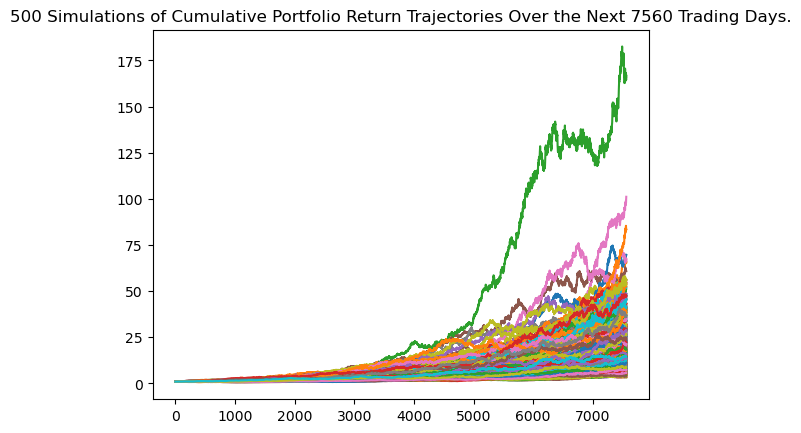

In [20]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()

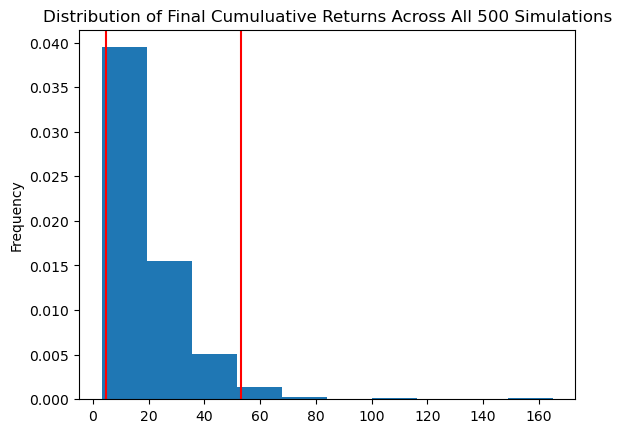

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             19.416255
std              14.423188
min               3.209070
25%              10.242096
50%              15.382918
75%              24.595987
max             164.870209
95% CI Lower      4.837996
95% CI Upper     53.067424
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $96759.91 and $1061348.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145139.87 and $1592022.73


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data=df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008750,1.011265,0.987239,1.000679,1.006738,0.992542,1.007326,0.998730,1.007548,0.996639,...,0.992962,1.005502,0.986685,1.002166,1.001542,1.006448,0.999160,0.998148,0.988120,1.002727
2,0.998033,1.007642,0.984973,0.995858,0.991720,0.991072,0.998024,1.003388,1.003020,0.999307,...,0.979162,1.008526,0.991863,1.005875,1.007038,0.999163,0.991929,0.993774,0.992127,0.999221
3,0.996587,1.005532,0.985014,0.982893,0.992403,0.990922,1.003332,0.995173,1.010497,0.996633,...,0.979807,1.006356,0.985447,1.020103,1.006028,1.004340,0.999496,0.978916,0.976676,0.991790
4,1.010365,1.004156,0.974130,0.994382,0.989498,0.984450,1.005199,1.000626,1.017496,0.992174,...,0.984336,0.996928,0.988669,1.014878,1.016925,1.001348,1.001505,0.980833,0.973476,1.003910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.947753,1.315061,1.266102,2.265361,1.664252,1.488804,1.856513,1.803047,1.889502,1.582524,...,1.215113,1.635454,1.248647,1.560278,1.389031,1.926148,1.614295,2.618292,1.264128,1.179991
1257,0.946739,1.310765,1.261763,2.292965,1.678313,1.480105,1.869475,1.810687,1.868936,1.573423,...,1.217237,1.642135,1.243752,1.539176,1.387783,1.940220,1.617831,2.669619,1.260053,1.174993
1258,0.938204,1.311694,1.280122,2.290601,1.674883,1.482509,1.882577,1.804819,1.856767,1.569765,...,1.214824,1.649523,1.231414,1.530850,1.384695,1.937027,1.621707,2.663188,1.262331,1.190677
1259,0.925351,1.314866,1.281851,2.278653,1.674463,1.492385,1.893502,1.805918,1.858892,1.567148,...,1.214116,1.667353,1.241332,1.522244,1.383516,1.922504,1.608878,2.661339,1.263271,1.192193


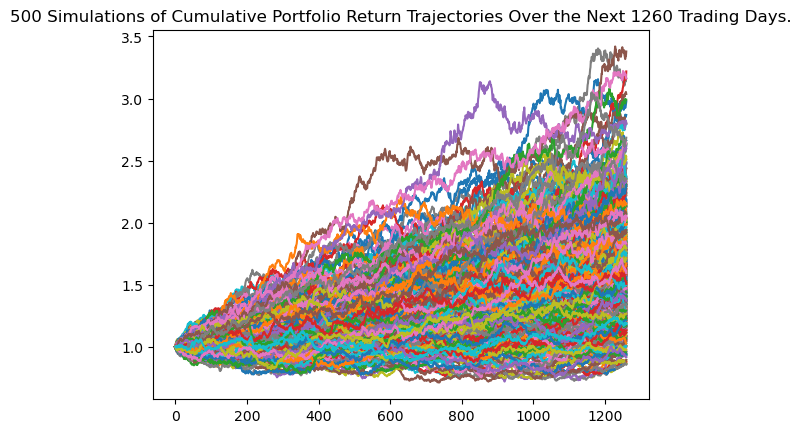

In [27]:
# Plot simulation outcomes
fiveyears_line_plot = MC_fiveyears.plot_simulation()

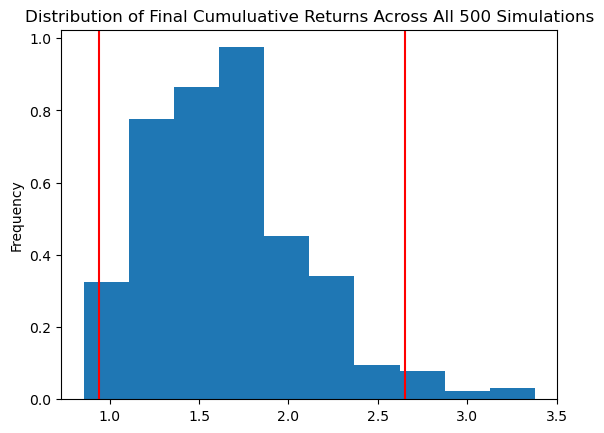

In [28]:
# Plot probability distribution and confidence intervals
fiveyears_dist_plot = MC_fiveyears.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_fiveyears = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_fiveyears)

count           500.000000
mean              1.646827
std               0.441977
min               0.855225
25%               1.327755
50%               1.618254
75%               1.872926
max               3.378749
95% CI Lower      0.938908
95% CI Upper      2.650169
Name: 1260, dtype: float64


In [40]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_fiveyears[8] * initial_investment, 2)
ci_upper_five = round(tbl_fiveyears[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56334.5 and $159010.14


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252 * 10
)
    

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984338,1.002589,0.998979,0.994695,1.008586,1.000486,1.020379,0.980267,0.984372,0.997786,...,0.991338,1.014904,0.999790,0.985377,1.003696,0.997130,0.988868,0.990777,0.996170,0.990213
2,0.992054,0.998939,0.990668,0.997867,1.008865,1.006991,1.024695,1.001252,0.990694,0.995836,...,0.989977,1.013843,0.996719,0.985641,1.011141,0.999820,0.988316,1.002992,0.979939,0.993417
3,0.983586,0.995945,0.991048,0.996308,1.008363,1.010541,1.026066,1.007548,0.985245,0.987998,...,0.986581,1.012024,0.988963,0.971519,1.003739,0.999964,0.990177,0.999089,0.990112,1.005592
4,0.988132,0.999494,0.982789,1.008515,1.003315,0.998891,1.037982,1.016253,0.986710,0.981575,...,0.975685,1.014208,1.004170,0.982027,1.003518,0.998612,0.997445,0.989173,0.981967,1.020378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.177172,5.829160,3.355582,3.802114,4.868020,15.301374,4.471407,1.761577,2.925299,1.995947,...,4.788633,5.168517,3.044818,2.524770,3.346084,2.873666,2.751386,6.588554,4.328816,2.511746
2517,3.209333,5.812531,3.375712,3.793357,4.927066,15.274085,4.486388,1.758430,2.946511,1.969900,...,4.820893,5.178737,3.071393,2.518595,3.300090,2.868255,2.725971,6.700776,4.296439,2.507446
2518,3.249051,5.786991,3.362730,3.781220,4.937178,15.294273,4.537656,1.770349,2.948818,1.978453,...,4.858660,5.284010,3.050675,2.551872,3.229919,2.848274,2.742545,6.687422,4.280795,2.551084
2519,3.275628,5.715049,3.362210,3.782322,4.904457,15.110809,4.554644,1.783134,2.975253,2.003701,...,4.860971,5.363677,3.021167,2.601272,3.206302,2.874559,2.770822,6.730726,4.310740,2.566186


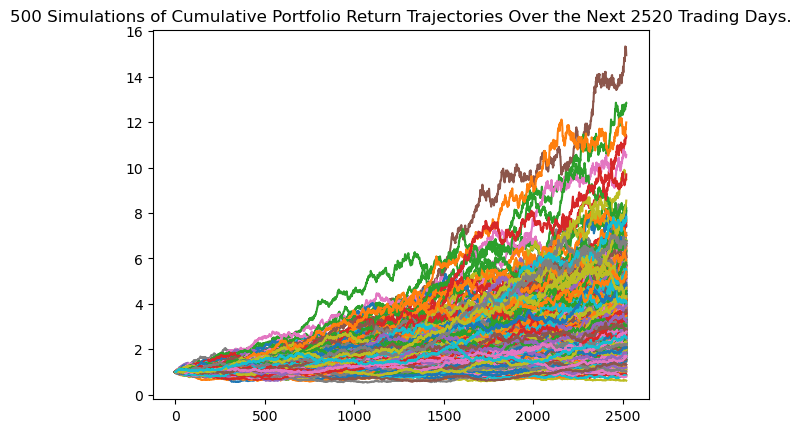

In [36]:
# Plot simulation outcomes
tenyears_line_plot = MC_tenyears.plot_simulation()

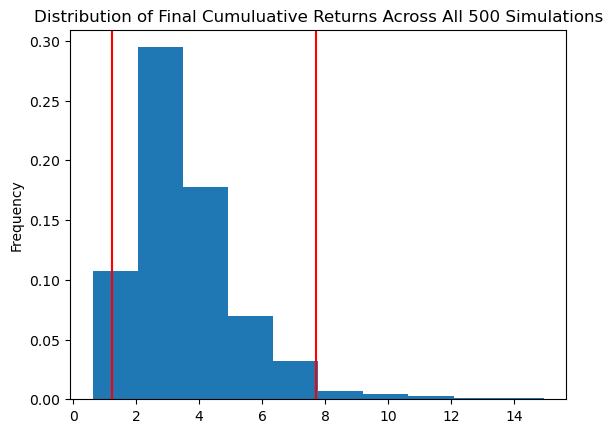

In [37]:
# Plot probability distribution and confidence intervals
tenyears_dist_plot = MC_tenyears.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_tenyears = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tbl_tenyears)

count           500.000000
mean              3.571574
std               1.784914
min               0.618519
25%               2.374727
50%               3.180465
75%               4.381838
max              14.945836
95% CI Lower      1.215279
95% CI Upper      7.710988
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_tenyears[8] * initial_investment, 2)
ci_upper_ten = round(tbl_tenyears[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72916.76 and $462659.3


According to 95% confidence interval, weighting the portfolio more heavily toward stocks allow the credit union members to retire after 10 years.